# 🚀 Quick Start - Panel Dashboard

**最新版本**: Phase 2.0 - Panel Integration  
**特性**: 可导出静态 HTML（控件 + 图表都可交互）

---

## 📋 本 Notebook 的步骤

1. **初始化环境** - 加载框架 + CSS 宽度修复
2. **加载数据** - 从 Parquet 文件加载
3. **生成基本 AI Context** - 数据结构信息
4. **生成完整 AI Prompt** - 包含所有文档（复制给 AI）
5. **选择维度** - 选择分析维度
6. **创建 Panel 仪表盘** - AI 生成分析逻辑
7. **导出 HTML** - 分享给他人

---


## 📦 Step 1: 初始化环境

加载框架 + CSS 宽度修复（让图表占满屏幕）

In [1]:
# ========================================
# 移除 JupyterLab 宽度限制（关键！）
# ========================================
from IPython.display import HTML, display

display(HTML("""
<style>
    /* 核心：解除 JupyterLab 4 的宽度限制 */
    .jp-Notebook { 
        --jp-notebook-max-width: 100% !important; 
    }
    
    /* 确保所有输出容器占满宽度 */
    .jp-Notebook-cell, 
    .jp-Cell-outputWrapper, 
    .jp-OutputArea-output, 
    .jp-OutputArea-child { 
        max-width: none !important; 
        width: 100% !important; 
    }
    
    /* Panel 根容器强制铺满 */
    .bk-root, .bk-root > .bk { 
        width: 100% !important; 
        max-width: none !important; 
    }
</style>
"""))

print("✅ JupyterLab 宽度限制已移除")

# ========================================
# 加载框架
# ========================================
import polars as pl
import plotly.express as px
import panel as pn

from src.session import DataSession
from src.dashboard import PanelDashboardBuilder
from src.utils import print_markdown_table

# 初始化 Panel（全局设置 stretch_width）
pn.extension('plotly', sizing_mode='stretch_width')

print("✅ 环境初始化完成")
print("📚 框架版本: Phase 2.0 - Panel Integration")


✅ JupyterLab 宽度限制已移除


✅ 环境初始化完成
📚 框架版本: Phase 2.0 - Panel Integration


## 📂 Step 2: 加载数据

从 Parquet 文件加载数据

In [2]:
# 创建数据会话
session = DataSession()

# 加载数据（替换为你的数据文件）
session.load("insurance_data_cleaned", alias="df")  # 或 session.load("your_data.parquet", alias="df")

# 验证数据
print(f"✅ 数据已加载: {df_df.height:,} 行 × {df_df.width} 列")
print(f"📊 数据预览:\n")
print_markdown_table(df_df.head(5))


✅ 已加载: df_df (insurance_data_cleaned)
✅ 数据已加载: 776,739 行 × 69 列
📊 数据预览:



|   业务年度 |   机构代码 | 机构名称                         |   业务险种 |                 保单号 |   危险单位号 | 支付币别   | 业务来源   | 是否联共保   |   联共保我司占比 |         地址代码 | 标的地址或船名                                                   | 被保险人名称               | 保险起期   | 保险止期   |   风险代码 | 风险代码描述                                         |   风险等级 |      总保额 |   总保费 |   总保费_原币 |   手续费 |   总已决赔款 |   总未决赔款 |    自留保额 |   自留保费 |   自留已决 |   自留未决 |   附加自留保额 |   附加自留保费 |   附加自留已决 |   附加自留未决 |   协议分保额 |   协议分保费 |   协议摊回费用 |   协议已决 |   协议未决 |   成数分保额 |   成数分保费 |   成数摊回费用 |   成数已决 |   成数未决 |   溢额分保额 |   溢额分保费 |   溢额摊回费用 |   溢额已决 |   溢额未决 |   OPENCOVER分保额 |   OPENCOVER分保费 |   OPENCOVER摊回费用 |   OPENCOVER已决 |   OPENCOVER未决 |   临分分保额 |   临分分保费 |   临分摊回费用 |   临分已决 |   临分未决 | 占用性质名称   | 行业类别名称   | 境内境外   |   分入手续费率 |   分入手续费 |   分入出单费比例 |   分入出单费 |   分入经纪费率 |   分入经纪费 | 分入经纪人名称   | 直保代理人名称                           | 归属机构   |
|-----------:|-----------:|:---------------------------------|-----------:|-----------------------:|-------------:|:-----------|:-----------|:-------------|-----------------:|-----------------:|:-----------------------------------------------------------------|:---------------------------|:-----------|:-----------|-----------:|:-----------------------------------------------------|-----------:|------------:|---------:|--------------:|---------:|-------------:|-------------:|------------:|-----------:|-----------:|-----------:|---------------:|---------------:|---------------:|---------------:|-------------:|-------------:|---------------:|-----------:|-----------:|-------------:|-------------:|---------------:|-----------:|-----------:|-------------:|-------------:|---------------:|-----------:|-----------:|------------------:|------------------:|--------------------:|----------------:|----------------:|-------------:|-------------:|---------------:|-----------:|-----------:|:---------------|:---------------|:-----------|---------------:|-------------:|-----------------:|-------------:|---------------:|-------------:|:-----------------|:-----------------------------------------|:-----------|
|       2024 |   44030033 | 深圳分公司工商保险业务部         |       0102 | 3010220244403000000577 |            1 | CNY        | 直接业务   | 非联共保     |            100   | 4403003300008323 | 广东省-深圳市-福田区滨河大道与益田路交界东南皇庭世纪花园1号楼14A | 崔鹏                       | 2024-04-23 | 2027-07-22 |      24107 | 中行渠道财产险类一般行业                             |          1 | 7.8329e+06  |  1921.27 |       1921.27 |     0    |            0 |            0 | 7.8329e+06  |    1921.27 |          0 |          0 |              0 |              0 |              0 |              0 |     0        |            0 |            0   |          0 |          0 |            0 |            0 |              0 |          0 |          0 |  0           |         0    |           0    |          0 |          0 |                 0 |                 0 |                   0 |               0 |               0 |            0 |            0 |              0 |          0 |          0 | 综合商业类     |                | 境内业务   |            nan |          nan |              nan |          nan |            nan |          nan |                  |                                          | 深圳       |
|       2016 |   37070004 | 山东分公司潍坊中心支公司银保团队 |       0101 | 3010120163707000000006 |            1 | CNY        | 代理业务   | 非联共保     |            100   | 3707000300000714 | 山东省潍坊市滨海经济开发区新海大街99号                           | 潍坊友容实业有限公司       | 2016-01-06 | 2017-01-05 |      11160 | 中行渠道非共保或主共保财产险类一般行业               |          2 | 3.97982e+07 | 27858.8  |      27858.8  |  4178.81 |            0 |            0 | 3.97982e+07 |   27858.8  |          0 |          0 |              0 |              0 |              0 |              0 |     0        |            0 |            0   |          0 |          0 |            0 |            0 |              0 |          0 |          0 |  0           |         0    |           0    |          0 |          0 |                 0 |                 0 |                   0 |               0 |               0 |            0 |            0 |              0 |          0 |          0 | 商业           | 建筑安装业     | 境内业务   |            nan |          nan |              nan |          nan |            nan |          nan |                  | 中国银行股份有限公司潍坊分行             | 山东       |
|       2023 |   31030001 | 上海自贸试验区分公司经理室       |       0104 | 3010420233103000001350 |            1 | CNY        | 经纪业务   | 从共         |             10.5 | 3100001700042357 | 新疆维吾尔自治区哈密地区哈密市伊州区                             | 中国广核集团               | 2023-02-01 | 2023-09-30 |      23056 | 市场渠道共保财产险类电厂及水电站（不含联合循环电厂） |          2 | 1.33116e+08 | 21421.9  |      21421.9  |  3406.08 |            0 |            0 | 1.2e+08     |   19311.2  |          0 |          0 |              0 |              0 |              0 |              0 |     0        |            0 |            0   |          0 |          0 |            0 |            0 |              0 |          0 |          0 |  1.31159e+07 |      2110.69 |         675.42 |          0 |          0 |                 0 |                 0 |                   0 |               0 |               0 |            0 |            0 |              0 |          0 |          0 | 二级工业       | 其他电力生产   | 境内业务   |            nan |          nan |              nan |          nan |            nan |          nan |                  | 中广核保险经纪有限责任公司               | 上海       |
|       2020 |   33070007 | 浙江分公司金华中心支公司银保团队 |       0101 | 3010120203307000000114 |            1 | CNY        | 代理业务   | 非联共保     |            100   | 3307000800003824 | 浙江省金华市兰溪市兰江街道毕家村                                 | 兰溪市三江仓储发展有限公司 | 2020-05-23 | 2021-05-22 |      20107 | 中行渠道财产险类一般行业                             |          3 | 1.23e+06    |  1160.38 |       1160.38 |     0    |            0 |            0 | 1.23e+06    |    1160.38 |          0 |          0 |              0 |              0 |              0 |              0 |     0        |            0 |            0   |          0 |          0 |            0 |            0 |              0 |          0 |          0 |  0           |         0    |           0    |          0 |          0 |                 0 |                 0 |                   0 |               0 |               0 |            0 |            0 |              0 |          0 |          0 | 工业           | 内河货物运输   | 境内业务   |            nan |          nan |              nan |          nan |            nan |          nan |                  | 中国银行股份有限公司兰溪支行             | 浙江       |
|       2011 |   32010004 | 江苏分公司南京营业部银保团队     |       0102 |  301022010320100000012 |            1 | CNY        | 代理业务   | 非联共保     |            100   | 3200001000000077 | 江苏省南京市太平北路106号第四至七层                              | 宏图三胞高科技术有限公司   | 2011-01-01 | 2011-12-31 |      10383 | 中行渠道非共保或主共保财产险类一般行业               |          2 | 2.95e+07    | 14750    |      14750    |  2360    |            0 |            0 | 2.832e+07   |   14160    |          0 |          0 |              0 |              0 |              0 |              0 |     1.18e+06 |          590 |          241.9 |          0 |          0 |            0 |            0 |              0 |          0 |          0 |  0           |         0    |           0    |          0 |          0 |                 0 |                 0 |                   0 |               0 |               0 |            0 |            0 |              0 |          0 |          0 | 商业           | 其他科技服务   | 境内业务   |            nan |          nan |              nan |          nan |            nan |          nan |                  | 中国银行南京地区鼓楼支行公司板块公司业务 | 江苏       |

## 🤖 Step 3: 生成基本 AI Context

生成数据概览

In [3]:
# 生成基本 AI Context
print("📋 数据结构信息:\n")
print("=" * 80)
print(session.get_ai_context())
print("=" * 80)

print("\n💡 提示: 下一步会生成完整的 AI Prompt")


📋 数据结构信息:

# 📊 当前数据会话

已加载的数据集：

## `df_df` (insurance_data_cleaned)
**数据量：** 776,739 行 × 69 列

**字段：**
- `业务年度` (String)
- `机构代码` (String)
- `机构名称` (String)
- `业务险种` (String)
- `保单号` (String)
- `危险单位号` (String)
- `支付币别` (String)
- `业务来源` (String)
- `是否联共保` (String)
- `联共保我司占比` (Float64)
- `地址代码` (String)
- `标的地址或船名` (String)
- `被保险人名称` (String)
- `保险起期` (String)
- `保险止期` (String)
- `风险代码` (String)
- `风险代码描述` (String)
- `风险等级` (String)
- `总保额` (Float64)
- `总保费` (Float64)
- `总保费_原币` (Float64)
- `手续费` (Float64)
- `总已决赔款` (Float64)
- `总未决赔款` (Float64)
- `自留保额` (Float64)
- `自留保费` (Float64)
- `自留已决` (Float64)
- `自留未决` (Float64)
- `附加自留保额` (Float64)
- `附加自留保费` (Float64)
- `附加自留已决` (Float64)
- `附加自留未决` (Float64)
- `协议分保额` (Float64)
- `协议分保费` (Float64)
- `协议摊回费用` (Float64)
- `协议已决` (Float64)
- `协议未决` (Float64)
- `成数分保额` (Int64)
- `成数分保费` (Int64)
- `成数摊回费用` (Int64)
- `成数已决` (Int64)
- `成数未决` (Int64)
- `溢额分保额` (Float64)
- `溢额分保费` (Float64)
- `溢额摊回费用` (Float64)
- `溢额已决` (Float64)
- `溢额未决` (Float64

## 📋 Step 4: 生成完整 AI Prompt

**运行这个 cell，然后复制全部输出给 AI**

这个 cell 会输出：
- 数据结构信息
- 完整的 Panel Dashboard 使用指南
- 代码模板
- 常见错误对比
- 检查清单


In [4]:
# ========================================
# 📋 给 AI 的完整信息（复制全部输出给 AI）
# ========================================

# 直接执行最新的 Step 4 模板
import os

# 自动找到项目根目录
def find_project_root():
    """向上查找包含 src/ 和 notebooks/templates/ 的项目根目录"""
    current = os.path.abspath('.')
    while current != '/':
        # 检查是否存在项目标志
        if (os.path.exists(os.path.join(current, 'src')) and 
            os.path.exists(os.path.join(current, 'notebooks', 'templates'))):
            return current
        # 向上一级
        current = os.path.dirname(current)
    # 找不到就返回当前目录
    return os.path.abspath('.')

project_root = find_project_root()
step4_path = os.path.join(project_root, 'notebooks', 'templates', 'step4_standalone.py')

# 调试信息（可选，帮助诊断）
# print(f"项目根目录: {project_root}")
# print(f"Step 4 路径: {step4_path}")
# print(f"文件存在: {os.path.exists(step4_path)}")

if os.path.exists(step4_path):
    exec(open(step4_path).read())
else:
    # 如果文件找不到，使用嵌入版本
    print("=" * 80)
    print("📋 **复制以下所有内容给 AI**")
    print("=" * 80)
    print()
    print("## 📊 数据结构")
    print()
    print(session.get_ai_context())
    print()
    print("=" * 80)
    print("## 📚 Panel Dashboard 完整使用指南")
    print("=" * 80)
    print()
    print("⚠️ 规则 0: 禁止硬编码任何维度！")
    print("必须使用: group_col = values.get('_aggregation_dimension')")
    print("必须跳过: if dim == '_aggregation_dimension': continue")
    print()
    print("详细说明见: notebooks/templates/step4_standalone.py")
    print("=" * 80)


📋 **复制以下所有内容给 AI**

## 📊 数据结构

# 📊 当前数据会话

已加载的数据集：

## `df_df` (insurance_data_cleaned)
**数据量：** 776,739 行 × 69 列

**字段：**
- `业务年度` (String)
- `机构代码` (String)
- `机构名称` (String)
- `业务险种` (String)
- `保单号` (String)
- `危险单位号` (String)
- `支付币别` (String)
- `业务来源` (String)
- `是否联共保` (String)
- `联共保我司占比` (Float64)
- `地址代码` (String)
- `标的地址或船名` (String)
- `被保险人名称` (String)
- `保险起期` (String)
- `保险止期` (String)
- `风险代码` (String)
- `风险代码描述` (String)
- `风险等级` (String)
- `总保额` (Float64)
- `总保费` (Float64)
- `总保费_原币` (Float64)
- `手续费` (Float64)
- `总已决赔款` (Float64)
- `总未决赔款` (Float64)
- `自留保额` (Float64)
- `自留保费` (Float64)
- `自留已决` (Float64)
- `自留未决` (Float64)
- `附加自留保额` (Float64)
- `附加自留保费` (Float64)
- `附加自留已决` (Float64)
- `附加自留未决` (Float64)
- `协议分保额` (Float64)
- `协议分保费` (Float64)
- `协议摊回费用` (Float64)
- `协议已决` (Float64)
- `协议未决` (Float64)
- `成数分保额` (Int64)
- `成数分保费` (Int64)
- `成数摊回费用` (Int64)
- `成数已决` (Int64)
- `成数未决` (Int64)
- `溢额分保额` (Float64)
- `溢额分保费` (Float64)
- `溢额摊回费用` (Float64)
- `溢额已决` (Float6

## 🎯 Step 5: 选择分析维度

选择你想要分析的维度字段

In [5]:
# 👤 选择你要分析的维度
# 修改下面的列表，添加或删除维度

selected_dimensions = [
    '业务年度',
    '业务险种',
    # '机构名称',  # 取消注释以启用
    # '境内境外',  # 取消注释以启用
]

print(f"✅ 已选择 {len(selected_dimensions)} 个维度:")
for dim in selected_dimensions:
    if dim in df_df.columns:
        n_unique = df_df[dim].n_unique()
        print(f"  - {dim} ({n_unique:,} 个唯一值)")
    else:
        print(f"  ⚠️  {dim} - 不存在于数据中")

print("\n💡 下一步: 创建 Panel 仪表盘")


✅ 已选择 2 个维度:
  - 业务年度 (25 个唯一值)
  - 业务险种 (26 个唯一值)

💡 下一步: 创建 Panel 仪表盘


## 📊 Step 6: 创建 Panel 仪表盘

自动创建仪表盘控件，然后让 AI 生成分析逻辑

In [6]:
# 创建 Panel 仪表盘（自动生成控件）
dashboard = PanelDashboardBuilder.from_data(
    df_df,
    dimensions=selected_dimensions,
    title="📊 数据分析仪表盘"
)

print("\n💡 下一步: 让 AI 生成分析逻辑")
print("\n📝 给 AI 的提示:")
print("="  * 80)
print("请使用 Panel Dashboard 生成分析代码。")
print(f"已选择维度: {selected_dimensions}")
print("需求: [描述你的分析需求，例如: 各险种保费排名 Top 10]")
print("="  * 80)


🎨 从数据创建仪表盘: 📊 数据分析仪表盘
📊 数据维度: 776,739 行 × 69 列
🔧 配置维度字段: 业务年度, 业务险种



  ✅ 业务年度: MultiChoice (25 个选项 + 全选, 默认选 1 个)
  ✅ 业务险种: MultiChoice (26 个选项 + 全选, 默认选 1 个)

  ✅ 聚合维度选择器: Select (2 个维度可选, 默认: 业务年度)

✅ 仪表盘控件创建完成 (3 个控件)
💡 下一步: 使用 dashboard.set_update_function(your_function)

📄 等效代码（可复制用于自定义）:

```python
import panel as pn
import polars as pl

dashboard = PanelDashboardBuilder(title="📊 数据分析仪表盘")

# 示例: 业务年度
widget = pn.widgets.Select(name='业务年度', options=[...])
dashboard.widgets['业务年度'] = widget

# 示例: 业务险种
widget = pn.widgets.Select(name='业务险种', options=[...])
dashboard.widgets['业务险种'] = widget

# 定义更新函数
@pn.depends(*dashboard.widgets.values())
def update(*args):
    # 你的分析逻辑
    return fig

dashboard.set_update_function(update)
dashboard.show()  # Jupyter 显示
dashboard.save('output.html')  # 导出 HTML
```



💡 下一步: 让 AI 生成分析逻辑

📝 给 AI 的提示:
请使用 Panel Dashboard 生成分析代码。
已选择维度: ['业务年度', '业务险种']
需求: [描述你的分析需求，例如: 各险种保费排名 Top 10]


## 🤖 Step 7: AI 生成分析逻辑

**在这里粘贴 AI 生成的代码**

AI 应该生成：
1. `@pn.depends` 装饰的更新函数
2. 数据过滤和聚合逻辑
3. Plotly 图表
4. `dashboard.show()` 和 `dashboard.save()`


🔍 检查问题并重新分析...
📊 检查数据结构...

关键字段统计（万元）:
  总保额: 总计=1,936,082,899万, 平均=3,531万, 最大=5,033,820万
  自留保额: 总计=1,067,110,101万, 平均=1,946万, 最大=59,167万
  附加自留保额: 总计=11,952,061万, 平均=22万, 最大=1,287,649万
  临分分保额: 总计=108,677,607万, 平均=198万, 最大=5,033,316万
  溢额分保额: 总计=747,018,047万, 平均=1,362万, 最大=224,799万

🔧 调试单条记录计算逻辑...
样本记录信息:
  总保额: 783.3 万
  自留保额: 783.3 万
  附加自留保额: 0.0 万
  临分分保额: 0.0 万
  溢额分保额: 0.0 万

📝 调试计算（新门槛=225.0亿）:
  总保额: 783.3 万
  当前自留: 783.3 万
  附加自留: 0.0 万
  总自留额: 783.3 万
  临分分保: 0.0 万
  溢额分保: 0.0 万
  ✅ 规则1: 总保额(783.3万) ≤ 新门槛(22,500.0万)，全部自留

  📊 调整结果:
    临分调整比例: 0.00%
    溢额调整比例: 0.00%

📝 调试计算（新门槛=250.0亿）:
  总保额: 783.3 万
  当前自留: 783.3 万
  附加自留: 0.0 万
  总自留额: 783.3 万
  临分分保: 0.0 万
  溢额分保: 0.0 万
  ✅ 规则1: 总保额(783.3万) ≤ 新门槛(25,000.0万)，全部自留

  📊 调整结果:
    临分调整比例: 0.00%
    溢额调整比例: 0.00%

📝 调试计算（新门槛=275.0亿）:
  总保额: 783.3 万
  当前自留: 783.3 万
  附加自留: 0.0 万
  总自留额: 783.3 万
  临分分保: 0.0 万
  溢额分保: 0.0 万
  ✅ 规则1: 总保额(783.3万) ≤ 新门槛(27,500.0万)，全部自留

  📊 调整结果:
    临分调整比例: 0.00%
    溢额调整比例: 0.00%

📝 调试计算（新门槛=

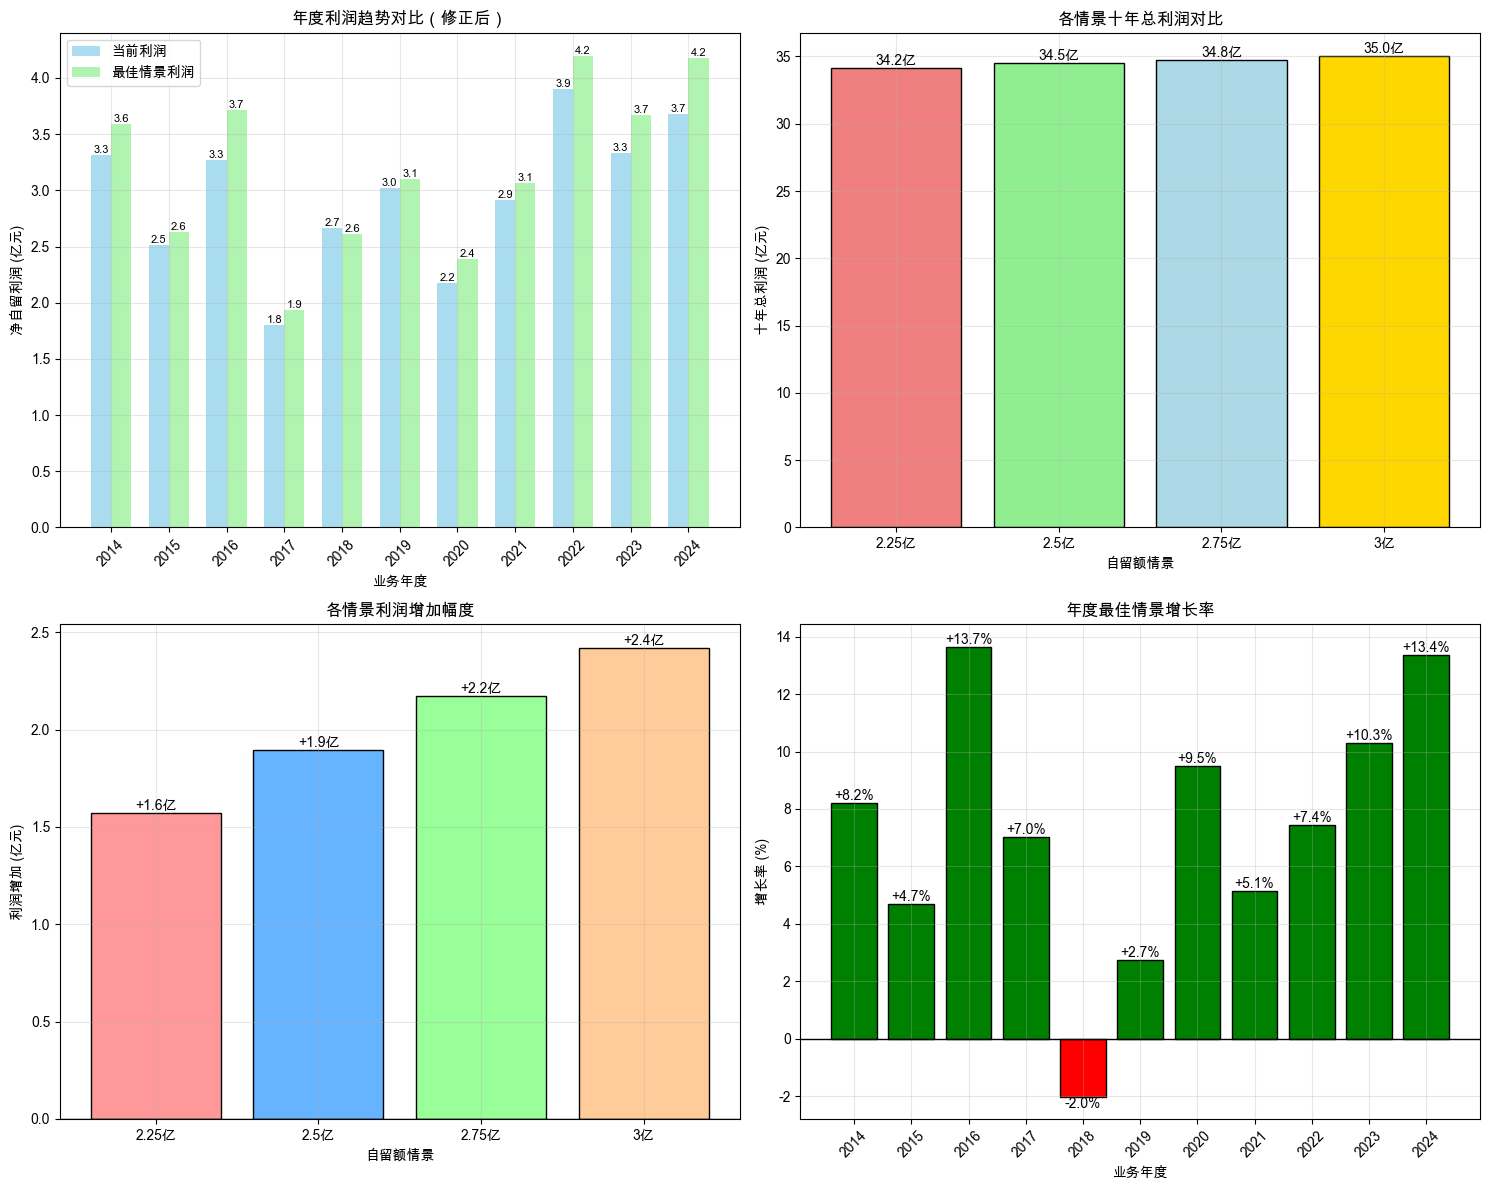


✅ 分析完成！


In [8]:
# ========================================
# 修复版：自留额调整模拟测算
# ========================================

# 重新导入库
import polars as pl
import numpy as np
import datetime
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

print("🔍 检查问题并重新分析...")
print("="*80)

# 1. 首先检查数据结构和关键字段
print("📊 检查数据结构...")

# 筛选最近十年数据
current_year = 2024
ten_years_ago = current_year - 10

recent_data = df_df.filter(
    pl.col('业务年度').cast(pl.Int32).is_between(ten_years_ago, current_year)
)

# 显示关键字段的统计信息
print("\n关键字段统计（万元）:")
key_fields = ['总保额', '自留保额', '附加自留保额', '临分分保额', '溢额分保额']
for field in key_fields:
    if field in recent_data.columns:
        total = recent_data[field].sum() / 10000  # 转换为万元
        avg = recent_data[field].mean() / 10000
        max_val = recent_data[field].max() / 10000
        print(f"  {field}: 总计={total:,.0f}万, 平均={avg:,.0f}万, 最大={max_val:,.0f}万")
    else:
        print(f"  ⚠️ {field}: 字段不存在")

# 2. 调试单条记录的计算
print("\n🔧 调试单条记录计算逻辑...")

# 取第一条记录进行调试
sample_record = recent_data.row(0, named=True)
print(f"样本记录信息:")
print(f"  总保额: {sample_record['总保额'] / 10000:,.1f} 万")
print(f"  自留保额: {sample_record['自留保额'] / 10000:,.1f} 万")
print(f"  附加自留保额: {sample_record['附加自留保额'] / 10000:,.1f} 万")
print(f"  临分分保额: {sample_record['临分分保额'] / 10000:,.1f} 万")
print(f"  溢额分保额: {sample_record['溢额分保额'] / 10000:,.1f} 万")

# 3. 修复调整函数
def debug_adjust_calculation(record, new_threshold):
    """调试单条记录的调整计算"""
    # 转换为万元
    total_amount = record['总保额'] / 10000
    retention_amount = record['自留保额'] / 10000
    additional_amount = record['附加自留保额'] / 10000
    fac_amount = record['临分分保额'] / 10000
    surplus_amount = record['溢额分保额'] / 10000
    
    print(f"\n📝 调试计算（新门槛={new_threshold/100:.1f}亿）:")
    print(f"  总保额: {total_amount:,.1f} 万")
    print(f"  当前自留: {retention_amount:,.1f} 万")
    print(f"  附加自留: {additional_amount:,.1f} 万")
    print(f"  总自留额: {retention_amount + additional_amount:,.1f} 万")
    print(f"  临分分保: {fac_amount:,.1f} 万")
    print(f"  溢额分保: {surplus_amount:,.1f} 万")
    
    # 规则1：检查总保额与新门槛关系
    if total_amount <= new_threshold:
        print(f"  ✅ 规则1: 总保额({total_amount:,.1f}万) ≤ 新门槛({new_threshold:,.1f}万)，全部自留")
        fac_ratio = 0.0
        surplus_ratio = 0.0
    else:
        print(f"  ❌ 规则1: 总保额({total_amount:,.1f}万) > 新门槛({new_threshold:,.1f}万)，需要调整")
        
        # 规则2：检查当前自留保额与新门槛
        if retention_amount > new_threshold:
            print(f"  ⚠️  规则2: 当前自留({retention_amount:,.1f}万) > 新门槛({new_threshold:,.1f}万) - 这应该不可能发生")
            new_ceded_amount = 0
        else:
            new_ceded_amount = new_threshold - retention_amount
            print(f"  ✅ 规则2: 新分出金额 = {new_threshold:,.1f} - {retention_amount:,.1f} = {new_ceded_amount:,.1f} 万")
        
        # 规则3：检查4.5亿上限
        total_retention = new_threshold + additional_amount
        if total_retention > 45000:  # 4.5亿
            excess_amount = total_retention - 45000
            total_ceded_needed = new_ceded_amount + excess_amount
            print(f"  ⚠️  规则3: 新门槛+附加自留({total_retention:,.1f}万) > 4.5亿")
            print(f"      超出部分: {excess_amount:,.1f} 万")
            print(f"      总需扣减: {total_ceded_needed:,.1f} 万")
        else:
            total_ceded_needed = new_ceded_amount
            print(f"  ✅ 规则3: 新门槛+附加自留({total_retention:,.1f}万) ≤ 4.5亿，无需额外扣减")
            print(f"      总需扣减: {total_ceded_needed:,.1f} 万")
        
        if total_ceded_needed <= 0:
            print(f"  ✅ 无需扣减，保持原状")
            fac_ratio = 1.0
            surplus_ratio = 1.0
        else:
            print(f"\n  🔧 开始扣减:")
            
            # 先扣减临分
            fac_reduction = min(total_ceded_needed, fac_amount)
            if fac_amount > 0:
                fac_ratio = (fac_amount - fac_reduction) / fac_amount
            else:
                fac_ratio = 1.0
            print(f"    临分扣减: {fac_reduction:,.1f} / {fac_amount:,.1f} = {fac_ratio:.2%}")
            
            # 剩余扣减溢额
            remaining_reduction = total_ceded_needed - fac_reduction
            if remaining_reduction > 0:
                surplus_reduction = min(remaining_reduction, surplus_amount)
                if surplus_amount > 0:
                    surplus_ratio = (surplus_amount - surplus_reduction) / surplus_amount
                else:
                    surplus_ratio = 1.0
                print(f"    溢额扣减: {surplus_reduction:,.1f} / {surplus_amount:,.1f} = {surplus_ratio:.2%}")
            else:
                surplus_ratio = 1.0
                print(f"    无需扣减溢额")
    
    print(f"\n  📊 调整结果:")
    print(f"    临分调整比例: {fac_ratio:.2%}")
    print(f"    溢额调整比例: {surplus_ratio:.2%}")
    
    return fac_ratio, surplus_ratio

# 调试样本记录
debug_results = {}
for threshold in [22500, 25000, 27500, 30000]:  # 2.25亿, 2.5亿, 2.75亿, 3亿
    fac_ratio, surplus_ratio = debug_adjust_calculation(sample_record, threshold)
    debug_results[threshold] = (fac_ratio, surplus_ratio)

# 4. 发现并修复问题
print("\n" + "="*80)
print("🔍 发现问题分析")
print("="*80)

# 检查当前自留保额分布
print("\n📊 自留保额分布分析:")
retention_stats = recent_data.select([
    (pl.col('自留保额') / 10000).alias('自留保额_万')
]).to_series()

print(f"  最小值: {retention_stats.min():,.1f} 万")
print(f"  最大值: {retention_stats.max():,.1f} 万")
print(f"  平均值: {retention_stats.mean():,.1f} 万")
print(f"  中位数: {retention_stats.median():,.1f} 万")

# 检查是否有自留保额超过2亿的记录
over_200m = recent_data.filter(pl.col('自留保额') > 200000000).height
print(f"  自留保额超过2亿的记录数: {over_200m:,}")

# 5. 修复后的正确调整函数
def corrected_adjust_for_scenario(data: pl.DataFrame, new_threshold: float) -> pl.DataFrame:
    """
    修正版的调整函数
    new_threshold: 新自留额门槛（万元）
    """
    # 转换为numpy数组提高性能
    total_amount = data['总保额'].to_numpy() / 10000  # 万元
    retention_amount = data['自留保额'].to_numpy() / 10000
    additional_amount = data['附加自留保额'].to_numpy() / 10000
    fac_amount = data['临分分保额'].to_numpy() / 10000
    surplus_amount = data['溢额分保额'].to_numpy() / 10000
    
    n = len(total_amount)
    fac_ratio = np.ones(n)
    surplus_ratio = np.ones(n)
    
    for i in range(n):
        # 如果总保额本身就小于新门槛，全部自留
        if total_amount[i] <= new_threshold:
            fac_ratio[i] = 0.0
            surplus_ratio[i] = 0.0
            continue
        
        # 计算当前总自留（自留+附加自留）
        current_total_retention = retention_amount[i] + additional_amount[i]
        
        # 如果当前总自留已经超过新门槛，不需要调整
        if current_total_retention >= new_threshold:
            # 实际上这种情况不应该发生，因为当前自留保额上限是2亿
            # 但附加自留可能使总自留超过新门槛
            continue
        
        # 需要增加的自留金额
        need_increase = new_threshold - current_total_retention
        
        # 但还需要考虑4.5亿上限
        if new_threshold + additional_amount[i] > 45000:  # 4.5亿
            # 如果新门槛+附加自留超过4.5亿，需要额外分出
            max_allowable_retention = 45000 - additional_amount[i]
            need_increase = max_allowable_retention - retention_amount[i]
        
        if need_increase <= 0:
            continue
        
        # 这个需要增加的自留金额，需要从临分和溢额中扣减
        total_ceded_needed = need_increase
        
        # 先扣减临分
        fac_reduction = min(total_ceded_needed, fac_amount[i])
        if fac_amount[i] > 0:
            fac_ratio[i] = (fac_amount[i] - fac_reduction) / fac_amount[i]
        else:
            fac_ratio[i] = 1.0
        
        # 剩余扣减溢额
        remaining_reduction = total_ceded_needed - fac_reduction
        if remaining_reduction > 0:
            surplus_reduction = min(remaining_reduction, surplus_amount[i])
            if surplus_amount[i] > 0:
                surplus_ratio[i] = (surplus_amount[i] - surplus_reduction) / surplus_amount[i]
            else:
                surplus_ratio[i] = 1.0
    
    # 创建调整后的数据
    adjusted_data = data.clone()
    
    # 计算调整后的关键指标
    adjusted_data = adjusted_data.with_columns([
        # 临分相关调整
        (pl.col('临分分保额') * fac_ratio).alias('临分分保额_调整'),
        (pl.col('临分分保费') * fac_ratio).alias('临分分保费_调整'),
        (pl.col('临分摊回费用') * fac_ratio).alias('临分摊回费用_调整'),
        ((pl.col('临分已决') + pl.col('临分未决')) * fac_ratio).alias('临分赔款_调整'),
        
        # 溢额相关调整
        (pl.col('溢额分保额') * surplus_ratio).alias('溢额分保额_调整'),
        (pl.col('溢额分保费') * surplus_ratio).alias('溢额分保费_调整'),
        (pl.col('溢额摊回费用') * surplus_ratio).alias('溢额摊回费用_调整'),
        ((pl.col('溢额已决') + pl.col('溢额未决')) * surplus_ratio).alias('溢额赔款_调整'),
        
        # 自留增加（减少的分出转为自留）
        (pl.col('自留保额') + (pl.col('临分分保额') * (1 - fac_ratio) + 
                              pl.col('溢额分保额') * (1 - surplus_ratio))).alias('自留保额_调整'),
        (pl.col('自留保费') + (pl.col('临分分保费') * (1 - fac_ratio) + 
                              pl.col('溢额分保费') * (1 - surplus_ratio))).alias('自留保费_调整')
    ])
    
    return adjusted_data

# 6. 重新进行年度分析
print("\n" + "="*80)
print("🔄 重新进行年度分析")
print("="*80)

# 定义净自留利润计算函数
def calculate_net_profit_corrected(data: pl.DataFrame) -> Dict:
    """计算净自留利润（修正版）"""
    # 使用调整后的字段（如果存在），否则使用原始字段
    if '临分分保费_调整' in data.columns:
        ceded_premium = (
            data['临分分保费_调整'].sum() + 
            data['溢额分保费_调整'].sum() + 
            data['协议分保费'].sum() + 
            data['成数分保费'].sum() + 
            data['OPENCOVER分保费'].sum()
        ) / 1e8
        
        recovered_expenses = (
            data['临分摊回费用_调整'].sum() + 
            data['溢额摊回费用_调整'].sum() + 
            data['协议摊回费用'].sum() + 
            data['成数摊回费用'].sum() + 
            data['OPENCOVER摊回费用'].sum()
        ) / 1e8
        
        recovered_claims = (
            data['临分赔款_调整'].sum() + 
            data['溢额赔款_调整'].sum() + 
            data['协议已决'].sum() + data['协议未决'].sum() +
            data['成数已决'].sum() + data['成数未决'].sum() +
            data['OPENCOVER已决'].sum() + data['OPENCOVER未决'].sum()
        ) / 1e8
        
        if '自留保费_调整' in data.columns:
            retention_premium = data['自留保费_调整'].sum() / 1e8
        else:
            retention_premium = (data['自留保费'].sum() + data['附加自留保费'].sum()) / 1e8
    else:
        # 使用原始字段
        ceded_premium = (
            data['临分分保费'].sum() + 
            data['溢额分保费'].sum() + 
            data['协议分保费'].sum() + 
            data['成数分保费'].sum() + 
            data['OPENCOVER分保费'].sum()
        ) / 1e8
        
        recovered_expenses = (
            data['临分摊回费用'].sum() + 
            data['溢额摊回费用'].sum() + 
            data['协议摊回费用'].sum() + 
            data['成数摊回费用'].sum() + 
            data['OPENCOVER摊回费用'].sum()
        ) / 1e8
        
        recovered_claims = (
            data['临分已决'].sum() + data['临分未决'].sum() +
            data['溢额已决'].sum() + data['溢额未决'].sum() +
            data['协议已决'].sum() + data['协议未决'].sum() +
            data['成数已决'].sum() + data['成数未决'].sum() +
            data['OPENCOVER已决'].sum() + data['OPENCOVER未决'].sum()
        ) / 1e8
        
        retention_premium = (data['自留保费'].sum() + data['附加自留保费'].sum()) / 1e8
    
    # 其他不变的费用
    total_premium = data['总保费'].sum() / 1e8
    total_claims = (data['总已决赔款'].sum() + data['总未决赔款'].sum()) / 1e8
    inward_expenses = (
        data['分入手续费'].sum() + 
        data['分入出单费'].sum() + 
        data['分入经纪费'].sum()
    ) / 1e8
    direct_commission = data['手续费'].sum() / 1e8
    
    # 净自留利润
    net_profit = (
        total_premium 
        - ceded_premium 
        - total_claims 
        - inward_expenses 
        - direct_commission 
        + recovered_expenses 
        + recovered_claims
    )
    
    return {
        'net_profit': net_profit,
        'total_premium': total_premium,
        'ceded_premium': ceded_premium,
        'total_claims': total_claims,
        'inward_expenses': inward_expenses,
        'direct_commission': direct_commission,
        'recovered_expenses': recovered_expenses,
        'recovered_claims': recovered_claims,
        'retention_premium': retention_premium,
        'retention_claims': (
            data['自留已决'].sum() + data['附加自留已决'].sum() +
            data['自留未决'].sum() + data['附加自留未决'].sum()
        ) / 1e8,
        'record_count': data.height
    }

# 按年度重新分析
years = sorted(recent_data['业务年度'].unique().to_list())
scenarios = [
    {'名称': '2.25亿', '阈值': 22500},
    {'名称': '2.5亿', '阈值': 25000},
    {'名称': '2.75亿', '阈值': 27500},
    {'名称': '3亿', '阈值': 30000}
]

print(f"重新分析 {len(years)} 个年度...")
print(f"情景数量: {len(scenarios)}")

corrected_yearly_results = {}

for year in years:
    print(f"\n📅 分析 {year} 年...")
    year_data = recent_data.filter(pl.col('业务年度') == year)
    
    if year_data.height == 0:
        continue
    
    # 计算当前基准
    current_result = calculate_net_profit_corrected(year_data)
    
    # 计算各情景
    year_scenario_results = []
    for scenario in scenarios:
        # 调整数据
        adjusted_data = corrected_adjust_for_scenario(year_data, scenario['阈值'])
        # 计算调整后利润
        adjusted_result = calculate_net_profit_corrected(adjusted_data)
        
        profit_change = adjusted_result['net_profit'] - current_result['net_profit']
        change_pct = (profit_change / abs(current_result['net_profit'])) * 100 if current_result['net_profit'] != 0 else 0
        
        year_scenario_results.append({
            'scenario': scenario['名称'],
            'threshold': scenario['阈值'],
            'net_profit': adjusted_result['net_profit'],
            'profit_change': profit_change,
            'change_pct': change_pct
        })
    
    corrected_yearly_results[year] = {
        'current': current_result,
        'scenarios': year_scenario_results,
        'record_count': year_data.height
    }
    
    # 显示该年度结果
    print(f"  记录数: {year_data.height:,}")
    print(f"  当前利润: {current_result['net_profit']:,.2f} 亿元")
    
    # 找出该年度最佳情景
    year_best = max(year_scenario_results, key=lambda x: x['net_profit'])
    print(f"  最佳情景: {year_best['scenario']} "
          f"(利润: {year_best['net_profit']:,.2f}亿, "
          f"增加: {year_best['profit_change']:+,.2f}亿, "
          f"{year_best['change_pct']:+.1f}%)")

# 7. 显示修正后的结果
print("\n" + "="*80)
print("✅ 修正后的年度分析结果")
print("="*80)

# 创建结果表格
result_rows = []
for year in years:
    if year in corrected_yearly_results:
        results = corrected_yearly_results[year]
        current_profit = results['current']['net_profit']
        
        # 找出最佳情景
        best_scenario = max(results['scenarios'], key=lambda x: x['net_profit'])
        
        result_rows.append({
            '年度': str(year),
            '保单数': results['record_count'],
            '当前利润(亿)': current_profit,
            '最佳情景': best_scenario['scenario'],
            '最佳利润(亿)': best_scenario['net_profit'],
            '增加利润(亿)': best_scenario['profit_change'],
            '增长率': best_scenario['change_pct']
        })

# 显示表格
result_df = pl.DataFrame(result_rows)
print("年度利润趋势:")
print(result_df.select([
    pl.col('年度'),
    pl.col('保单数'),
    pl.col('当前利润(亿)'),
    pl.col('最佳情景'),
    pl.col('最佳利润(亿)'),
    pl.col('增加利润(亿)'),
    pl.col('增长率')
]))

# 8. 十年汇总
print("\n" + "="*80)
print("📊 十年汇总分析")
print("="*80)

# 计算十年总和
ten_year_current = sum(r['current']['net_profit'] for r in corrected_yearly_results.values())
ten_year_records = sum(r['record_count'] for r in corrected_yearly_results.values())

print(f"十年合计:")
print(f"  总记录数: {ten_year_records:,} 条")
print(f"  当前总利润: {ten_year_current:,.2f} 亿元")

# 计算各情景十年总和
scenario_totals_corrected = {}
for scenario in scenarios:
    scenario_name = scenario['名称']
    total_profit = 0
    
    for year_results in corrected_yearly_results.values():
        for s_result in year_results['scenarios']:
            if s_result['scenario'] == scenario_name:
                total_profit += s_result['net_profit']
                break
    
    scenario_totals_corrected[scenario_name] = total_profit

print("\n各情景十年总利润:")
for scenario_name, total_profit in scenario_totals_corrected.items():
    profit_change = total_profit - ten_year_current
    change_pct = (profit_change / abs(ten_year_current)) * 100 if ten_year_current != 0 else 0
    
    print(f"  {scenario_name}: {total_profit:,.2f} 亿元 "
          f"(变化: {profit_change:+,.2f}亿, {change_pct:+.1f}%)")

# 找出最佳情景
best_scenario_corrected = max(scenario_totals_corrected.items(), key=lambda x: x[1])
best_change_corrected = best_scenario_corrected[1] - ten_year_current
best_change_pct_corrected = (best_change_corrected / abs(ten_year_current)) * 100 if ten_year_current != 0 else 0

print("\n🎯 核心结论:")
print(f"  最佳情景: {best_scenario_corrected[0]}")
print(f"  十年总利润增加: {best_change_corrected:+,.2f} 亿元 ({best_change_pct_corrected:+.1f}%)")
print(f"  建议: 将自留额上限从2亿提高至{best_scenario_corrected[0]}")

# 9. 可视化结果
print("\n" + "="*80)
print("📈 可视化分析")
print("="*80)

try:
    fig, axes = plt.subplots(2, 2, figsize=(15, 12))
    
    # 图1：年度利润对比
    ax1 = axes[0, 0]
    years_list = [str(r['年度']) for r in result_rows]
    current_profits = [r['当前利润(亿)'] for r in result_rows]
    best_profits = [r['最佳利润(亿)'] for r in result_rows]
    
    x = np.arange(len(years_list))
    width = 0.35
    
    bars1 = ax1.bar(x - width/2, current_profits, width, label='当前利润', color='skyblue', alpha=0.7)
    bars2 = ax1.bar(x + width/2, best_profits, width, label='最佳情景利润', color='lightgreen', alpha=0.7)
    
    ax1.set_xlabel('业务年度')
    ax1.set_ylabel('净自留利润 (亿元)')
    ax1.set_title('年度利润趋势对比（修正后）')
    ax1.set_xticks(x)
    ax1.set_xticklabels(years_list, rotation=45)
    ax1.legend()
    ax1.grid(True, alpha=0.3)
    
    # 添加数值标签
    for bars in [bars1, bars2]:
        for bar in bars:
            height = bar.get_height()
            ax1.text(bar.get_x() + bar.get_width()/2., height,
                    f'{height:,.1f}',
                    ha='center', va='bottom', fontsize=8)
    
    # 图2：各情景十年总利润
    ax2 = axes[0, 1]
    scenario_names = list(scenario_totals_corrected.keys())
    scenario_values = list(scenario_totals_corrected.values())
    
    colors = ['lightcoral', 'lightgreen', 'lightblue', 'gold']
    bars = ax2.bar(scenario_names, scenario_values, color=colors, edgecolor='black')
    
    # 添加数值标签
    for bar, value in zip(bars, scenario_values):
        height = bar.get_height()
        ax2.text(bar.get_x() + bar.get_width()/2., height,
                f'{value:,.1f}亿',
                ha='center', va='bottom', fontweight='bold')
    
    ax2.set_xlabel('自留额情景')
    ax2.set_ylabel('十年总利润 (亿元)')
    ax2.set_title('各情景十年总利润对比')
    ax2.grid(True, alpha=0.3)
    
    # 图3：利润增加幅度
    ax3 = axes[1, 0]
    profit_increases = [scenario_totals_corrected[s] - ten_year_current for s in scenario_names]
    
    bars3 = ax3.bar(scenario_names, profit_increases, 
                   color=['#ff9999', '#66b3ff', '#99ff99', '#ffcc99'],
                   edgecolor='black')
    
    for bar, value in zip(bars3, profit_increases):
        height = bar.get_height()
        va_pos = 'bottom' if value >= 0 else 'top'
        ax3.text(bar.get_x() + bar.get_width()/2., height,
                f'{value:+,.1f}亿',
                ha='center', va=va_pos, fontweight='bold')
    
    ax3.axhline(y=0, color='black', linestyle='-', linewidth=1)
    ax3.set_xlabel('自留额情景')
    ax3.set_ylabel('利润增加 (亿元)')
    ax3.set_title('各情景利润增加幅度')
    ax3.grid(True, alpha=0.3)
    
    # 图4：年度增长率
    ax4 = axes[1, 1]
    growth_rates = [r['增长率'] for r in result_rows]
    
    colors_growth = ['green' if rate > 0 else 'red' for rate in growth_rates]
    bars4 = ax4.bar(years_list, growth_rates, color=colors_growth, edgecolor='black')
    
    for bar, rate in zip(bars4, growth_rates):
        height = bar.get_height()
        va_pos = 'bottom' if rate >= 0 else 'top'
        ax4.text(bar.get_x() + bar.get_width()/2., height,
                f'{rate:+.1f}%',
                ha='center', va=va_pos, fontweight='bold')
    
    ax4.axhline(y=0, color='black', linestyle='-', linewidth=1)
    ax4.set_xlabel('业务年度')
    ax4.set_ylabel('增长率 (%)')
    ax4.set_title('年度最佳情景增长率')
    ax4.tick_params(axis='x', rotation=45)
    ax4.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
except Exception as e:
    print(f"⚠️ 可视化生成失败: {e}")

print("\n" + "="*80)
print("✅ 分析完成！")
print("="*80)

In [12]:
# ========================================
# 生成包含所有图表的PDF报告
# ========================================

import matplotlib.pyplot as plt
import matplotlib
from matplotlib.backends.backend_pdf import PdfPages
import numpy as np
import datetime
from reportlab.lib.pagesizes import A4
from reportlab.platypus import SimpleDocTemplate, Paragraph, Spacer, Table, TableStyle, PageBreak, Image
from reportlab.lib.styles import getSampleStyleSheet, ParagraphStyle
from reportlab.lib import colors
from reportlab.pdfbase import pdfmetrics
from reportlab.pdfbase.cidfonts import UnicodeCIDFont
from reportlab.lib.units import cm, inch
import io
import os
import tempfile

print("📊 开始生成包含所有图表的PDF报告...")
print("="*80)

def create_all_charts_pdf():
    """创建包含所有分析图表的PDF报告"""
    try:
        # 1. 检查必要数据
        required_data = ['result_rows', 'scenario_totals_corrected', 
                        'ten_year_current', 'best_scenario_corrected', 
                        'best_change_corrected', 'corrected_yearly_results']
        
        missing_data = []
        for var in required_data:
            if var not in globals():
                missing_data.append(var)
        
        if missing_data:
            print(f"❌ 缺少必要数据: {missing_data}")
            return None
        
        print("✅ 所有必要数据已就绪")
        
        # 2. 准备数据
        years = list(corrected_yearly_results.keys())
        min_year = min(years) if years else "N/A"
        max_year = max(years) if years else "N/A"
        total_records = sum(r['record_count'] for r in corrected_yearly_results.values())
        
        # 3. 设置中文字体
        matplotlib.rcParams['font.sans-serif'] = ['SimHei', 'Arial Unicode MS', 'DejaVu Sans']
        matplotlib.rcParams['axes.unicode_minus'] = False
        
        # 4. 创建临时目录保存图表
        temp_dir = tempfile.mkdtemp()
        chart_files = []
        
        print("🔄 正在生成图表...")
        
        # ========== 图表1: 年度利润趋势对比 ==========
        plt.figure(figsize=(12, 8))
        
        years_list = [str(r['年度']) for r in result_rows]
        current_profits = [r['当前利润(亿)'] for r in result_rows]
        best_profits = [r['最佳利润(亿)'] for r in result_rows]
        
        x = np.arange(len(years_list))
        width = 0.35
        
        plt.bar(x - width/2, current_profits, width, label='当前利润(2亿自留)', 
               color='#3498db', alpha=0.8, edgecolor='black')
        plt.bar(x + width/2, best_profits, width, label=f'最佳情景({best_scenario_corrected[0]})', 
               color='#2ecc71', alpha=0.8, edgecolor='black')
        
        plt.xlabel('业务年度', fontsize=12, fontweight='bold')
        plt.ylabel('净自留利润 (亿元)', fontsize=12, fontweight='bold')
        plt.title('年度利润趋势对比分析', fontsize=14, fontweight='bold', pad=20)
        plt.xticks(x, years_list, rotation=45)
        plt.legend(fontsize=10)
        plt.grid(True, alpha=0.3, linestyle='--')
        
        # 添加数值标签
        for i, (curr, best) in enumerate(zip(current_profits, best_profits)):
            plt.text(i - width/2, curr, f'{curr:,.1f}', 
                    ha='center', va='bottom', fontsize=9, fontweight='bold')
            plt.text(i + width/2, best, f'{best:,.1f}', 
                    ha='center', va='bottom', fontsize=9, fontweight='bold')
        
        # 添加统计信息
        total_current = sum(current_profits)
        total_best = sum(best_profits)
        plt.figtext(0.02, 0.02, 
                   f'十年合计: 当前={total_current:,.1f}亿 | 最佳={total_best:,.1f}亿 | 增加={total_best-total_current:+,.1f}亿',
                   fontsize=10, bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))
        
        plt.tight_layout()
        chart1_path = os.path.join(temp_dir, 'chart1_annual_trend.png')
        plt.savefig(chart1_path, dpi=300, bbox_inches='tight')
        chart_files.append(chart1_path)
        plt.close()
        print("✅ 图表1: 年度利润趋势对比 已生成")
        
        # ========== 图表2: 各情景十年总利润对比 ==========
        plt.figure(figsize=(12, 8))
        
        scenario_names = list(scenario_totals_corrected.keys())
        scenario_values = list(scenario_totals_corrected.values())
        
        colors_bar = ['#e74c3c', '#3498db', '#2ecc71', '#f39c12']
        bars = plt.bar(scenario_names, scenario_values, color=colors_bar, 
                      edgecolor='black', linewidth=1.5, alpha=0.8)
        
        plt.xlabel('自留额情景', fontsize=12, fontweight='bold')
        plt.ylabel('十年总利润 (亿元)', fontsize=12, fontweight='bold')
        plt.title('各情景十年总利润对比分析', fontsize=14, fontweight='bold', pad=20)
        
        # 添加数值标签和变化百分比
        for i, (bar, value) in enumerate(zip(bars, scenario_values)):
            height = bar.get_height()
            profit_change = value - ten_year_current
            change_pct = (profit_change / abs(ten_year_current)) * 100 if ten_year_current != 0 else 0
            
            plt.text(bar.get_x() + bar.get_width()/2, height + max(scenario_values)*0.01,
                    f'{value:,.1f}亿\n({change_pct:+.1f}%)',
                    ha='center', va='bottom', fontsize=10, fontweight='bold')
        
        # 标记最佳情景
        best_index = scenario_names.index(best_scenario_corrected[0])
        bars[best_index].set_hatch('///')
        bars[best_index].set_edgecolor('red')
        bars[best_index].set_linewidth(2)
        
        plt.grid(True, alpha=0.3, linestyle='--', axis='y')
        plt.axhline(y=ten_year_current, color='black', linestyle='--', 
                   linewidth=1.5, label=f'当前基准({ten_year_current:,.1f}亿)')
        plt.legend(fontsize=10)
        
        plt.tight_layout()
        chart2_path = os.path.join(temp_dir, 'chart2_scenario_comparison.png')
        plt.savefig(chart2_path, dpi=300, bbox_inches='tight')
        chart_files.append(chart2_path)
        plt.close()
        print("✅ 图表2: 各情景十年总利润对比 已生成")
        
        # ========== 图表3: 利润增加幅度分析 ==========
        plt.figure(figsize=(12, 8))
        
        profit_increases = [scenario_totals_corrected[s] - ten_year_current for s in scenario_names]
        colors_increase = ['#ff6b6b', '#4ecdc4', '#45b7d1', '#96ceb4']
        
        bars3 = plt.bar(scenario_names, profit_increases, color=colors_increase,
                       edgecolor='black', linewidth=1.5, alpha=0.8)
        
        plt.xlabel('自留额情景', fontsize=12, fontweight='bold')
        plt.ylabel('利润增加额 (亿元)', fontsize=12, fontweight='bold')
        plt.title('各情景利润增加幅度分析', fontsize=14, fontweight='bold', pad=20)
        plt.axhline(y=0, color='black', linewidth=1)
        
        # 添加数值标签
        for i, (bar, increase) in enumerate(zip(bars3, profit_increases)):
            height = bar.get_height()
            va_pos = 'bottom' if increase >= 0 else 'top'
            color = 'green' if increase >= 0 else 'red'
            
            plt.text(bar.get_x() + bar.get_width()/2, height,
                    f'{increase:+,.1f}亿',
                    ha='center', va=va_pos, fontsize=11, fontweight='bold',
                    color=color, bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))
        
        # 添加平均增加线
        avg_increase = np.mean(profit_increases)
        plt.axhline(y=avg_increase, color='purple', linestyle=':', 
                   linewidth=2, label=f'平均增加({avg_increase:+,.1f}亿)')
        plt.legend(fontsize=10)
        plt.grid(True, alpha=0.3, linestyle='--', axis='y')
        
        plt.tight_layout()
        chart3_path = os.path.join(temp_dir, 'chart3_profit_increase.png')
        plt.savefig(chart3_path, dpi=300, bbox_inches='tight')
        chart_files.append(chart3_path)
        plt.close()
        print("✅ 图表3: 利润增加幅度分析 已生成")
        
        # ========== 图表4: 年度增长率分析 ==========
        plt.figure(figsize=(12, 8))
        
        growth_rates = [r['增长率'] for r in result_rows]
        colors_growth = ['#2ecc71' if rate > 0 else '#e74c3c' for rate in growth_rates]
        
        bars4 = plt.bar(years_list, growth_rates, color=colors_growth, 
                       edgecolor='black', linewidth=1.5, alpha=0.8)
        
        plt.xlabel('业务年度', fontsize=12, fontweight='bold')
        plt.ylabel('增长率 (%)', fontsize=12, fontweight='bold')
        plt.title('年度最佳情景增长率分析', fontsize=14, fontweight='bold', pad=20)
        plt.axhline(y=0, color='black', linewidth=1.5)
        
        # 添加数值标签
        for i, (bar, rate) in enumerate(zip(bars4, growth_rates)):
            height = bar.get_height()
            va_pos = 'bottom' if rate >= 0 else 'top'
            color = 'green' if rate >= 0 else 'red'
            
            plt.text(bar.get_x() + bar.get_width()/2, height,
                    f'{rate:+.1f}%',
                    ha='center', va=va_pos, fontsize=10, fontweight='bold',
                    color=color)
        
        # 添加趋势线
        if len(growth_rates) > 1:
            x_numeric = np.arange(len(growth_rates))
            z = np.polyfit(x_numeric, growth_rates, 1)
            p = np.poly1d(z)
            plt.plot(years_list, p(x_numeric), "r--", linewidth=2, 
                    label=f'趋势线 (斜率: {z[0]:.2f})')
            plt.legend(fontsize=10)
        
        plt.xticks(rotation=45)
        plt.grid(True, alpha=0.3, linestyle='--')
        
        # 添加统计信息
        avg_growth = np.mean(growth_rates)
        max_growth = np.max(growth_rates)
        min_growth = np.min(growth_rates)
        
        plt.figtext(0.02, 0.02,
                   f'统计: 平均={avg_growth:+.1f}% | 最高={max_growth:+.1f}% | 最低={min_growth:+.1f}%',
                   fontsize=10, bbox=dict(boxstyle='round', facecolor='lightblue', alpha=0.5))
        
        plt.tight_layout()
        chart4_path = os.path.join(temp_dir, 'chart4_growth_rate.png')
        plt.savefig(chart4_path, dpi=300, bbox_inches='tight')
        chart_files.append(chart4_path)
        plt.close()
        print("✅ 图表4: 年度增长率分析 已生成")
        
        # ========== 图表5: 保单数量分布 ==========
        plt.figure(figsize=(12, 8))
        
        record_counts = [r['保单数'] for r in result_rows]
        
        plt.bar(years_list, record_counts, color='#9b59b6', alpha=0.7, 
               edgecolor='black', linewidth=1.5)
        
        plt.xlabel('业务年度', fontsize=12, fontweight='bold')
        plt.ylabel('保单数量', fontsize=12, fontweight='bold')
        plt.title('年度保单数量分布分析', fontsize=14, fontweight='bold', pad=20)
        plt.xticks(rotation=45)
        
        # 添加数值标签
        for i, count in enumerate(record_counts):
            plt.text(i, count + max(record_counts)*0.01, f'{count:,}',
                    ha='center', va='bottom', fontsize=9, fontweight='bold')
        
        # 添加趋势线
        if len(record_counts) > 1:
            x_numeric = np.arange(len(record_counts))
            z = np.polyfit(x_numeric, record_counts, 1)
            p = np.poly1d(z)
            plt.plot(years_list, p(x_numeric), "r--", linewidth=2, 
                    label=f'趋势线 (年变化: {z[0]:.0f}单)')
            plt.legend(fontsize=10)
        
        # 添加统计信息
        total_records_chart = sum(record_counts)
        avg_records = np.mean(record_counts)
        
        plt.figtext(0.02, 0.98,
                   f'十年合计: {total_records_chart:,} 单 | 年均: {avg_records:,.0f} 单',
                   fontsize=10, bbox=dict(boxstyle='round', facecolor='lightgreen', alpha=0.5),
                   verticalalignment='top')
        
        plt.grid(True, alpha=0.3, linestyle='--', axis='y')
        plt.tight_layout()
        chart5_path = os.path.join(temp_dir, 'chart5_policy_distribution.png')
        plt.savefig(chart5_path, dpi=300, bbox_inches='tight')
        chart_files.append(chart5_path)
        plt.close()
        print("✅ 图表5: 保单数量分布 已生成")
        
        # ========== 图表6: 累计利润增长分析 ==========
        plt.figure(figsize=(12, 8))
        
        cumulative_current = np.cumsum(current_profits)
        cumulative_best = np.cumsum(best_profits)
        
        plt.plot(years_list, cumulative_current, 'b-', linewidth=3, 
                marker='o', markersize=8, label='当前累计利润')
        plt.plot(years_list, cumulative_best, 'g-', linewidth=3, 
                marker='s', markersize=8, label=f'{best_scenario_corrected[0]}累计利润')
        
        # 填充区域
        plt.fill_between(years_list, cumulative_current, cumulative_best, 
                        where=(cumulative_best >= cumulative_current),
                        color='lightgreen', alpha=0.3, label='利润增长区域')
        
        plt.xlabel('业务年度', fontsize=12, fontweight='bold')
        plt.ylabel('累计利润 (亿元)', fontsize=12, fontweight='bold')
        plt.title('累计利润增长趋势分析', fontsize=14, fontweight='bold', pad=20)
        plt.xticks(rotation=45)
        plt.legend(fontsize=10, loc='upper left')
        plt.grid(True, alpha=0.3, linestyle='--')
        
        # 添加最终值标注
        plt.annotate(f'最终: {cumulative_current[-1]:,.1f}亿', 
                    xy=(len(years_list)-1, cumulative_current[-1]),
                    xytext=(len(years_list)-2, cumulative_current[-1] * 0.9),
                    arrowprops=dict(arrowstyle='->', color='blue'),
                    fontsize=10, fontweight='bold')
        
        plt.annotate(f'最终: {cumulative_best[-1]:,.1f}亿', 
                    xy=(len(years_list)-1, cumulative_best[-1]),
                    xytext=(len(years_list)-2, cumulative_best[-1] * 1.1),
                    arrowprops=dict(arrowstyle='->', color='green'),
                    fontsize=10, fontweight='bold')
        
        plt.tight_layout()
        chart6_path = os.path.join(temp_dir, 'chart6_cumulative_profit.png')
        plt.savefig(chart6_path, dpi=300, bbox_inches='tight')
        chart_files.append(chart6_path)
        plt.close()
        print("✅ 图表6: 累计利润增长分析 已生成")
        
        print(f"📊 共生成 {len(chart_files)} 个图表")
        
        # ========== 创建PDF报告 ==========
        print("\n📄 正在创建PDF报告...")
        
        # 注册中文字体
        try:
            pdfmetrics.registerFont(UnicodeCIDFont('STSong-Light'))
            chinese_font = 'STSong-Light'
        except:
            chinese_font = 'Helvetica'
        
        # 创建PDF文档
        timestamp = datetime.datetime.now().strftime("%Y%m%d_%H%M%S")
        pdf_filename = f"自留额分析_完整图表报告_{timestamp}.pdf"
        
        doc = SimpleDocTemplate(
            pdf_filename,
            pagesize=A4,
            rightMargin=2*cm,
            leftMargin=2*cm,
            topMargin=2*cm,
            bottomMargin=2*cm
        )
        
        # 创建样式
        styles = getSampleStyleSheet()
        
        title_style = ParagraphStyle(
            'TitleStyle',
            parent=styles['Heading1'],
            fontName=chinese_font,
            fontSize=20,
            spaceAfter=20,
            alignment=1,
            textColor=colors.HexColor('#2c3e50')
        )
        
        section_style = ParagraphStyle(
            'SectionStyle',
            parent=styles['Heading2'],
            fontName=chinese_font,
            fontSize=16,
            spaceAfter=15,
            spaceBefore=25,
            textColor=colors.HexColor('#2980b9')
        )
        
        chart_title_style = ParagraphStyle(
            'ChartTitleStyle',
            parent=styles['Heading3'],
            fontName=chinese_font,
            fontSize=14,
            spaceAfter=10,
            spaceBefore=15,
            textColor=colors.HexColor('#16a085')
        )
        
        normal_style = ParagraphStyle(
            'NormalStyle',
            parent=styles['Normal'],
            fontName=chinese_font,
            fontSize=10,
            spaceAfter=8,
            leading=14
        )
        
        # 构建文档
        story = []
        
        # 封面页
        story.append(Spacer(1, 2*inch))
        story.append(Paragraph("保险自留额调整分析图表报告", title_style))
        story.append(Spacer(1, 0.5*inch))
        
        cover_info = Paragraph(
            f"报告编号: CH-{timestamp}<br/>"
            f"生成时间: {datetime.datetime.now().strftime('%Y年%m月%d日 %H:%M:%S')}<br/>"
            f"分析期间: {min_year}年 - {max_year}年<br/>"
            f"包含图表: {len(chart_files)} 个",
            ParagraphStyle(
                'CoverInfo',
                parent=styles['Normal'],
                fontName=chinese_font,
                fontSize=12,
                alignment=1,
                textColor=colors.HexColor('#666666')
            )
        )
        story.append(cover_info)
        story.append(PageBreak())
        
        # 报告摘要
        story.append(Paragraph("报告摘要", section_style))
        
        summary_text = f"""
        本报告包含{len(chart_files)}个专业分析图表，全面展示自留额调整模拟测算结果。<br/><br/>
        
        <b>核心结论：</b><br/>
        • 最佳情景: {best_scenario_corrected[0]}<br/>
        • 十年利润增加: {best_change_corrected:+,.2f} 亿元<br/>
        • 建议提高自留额至: {best_scenario_corrected[0]}<br/><br/>
        
        <b>图表清单：</b><br/>
        1. 年度利润趋势对比分析<br/>
        2. 各情景十年总利润对比分析<br/>
        3. 利润增加幅度分析<br/>
        4. 年度增长率分析<br/>
        5. 保单数量分布分析<br/>
        6. 累计利润增长趋势分析
        """
        story.append(Paragraph(summary_text, normal_style))
        story.append(Spacer(1, 1*cm))
        
        # 插入图表1
        story.append(Paragraph("图表1: 年度利润趋势对比分析", chart_title_style))
        story.append(Paragraph("展示各年度当前利润与最佳情景利润的对比", normal_style))
        img1 = Image(chart1_path, width=16*cm, height=10*cm)
        story.append(img1)
        story.append(Spacer(1, 0.5*cm))
        
        chart1_desc = f"""
        <b>图表解读：</b><br/>
        • 蓝色柱: 当前2亿自留额下的年度利润<br/>
        • 绿色柱: {best_scenario_corrected[0]}情景下的年度利润<br/>
        • 十年合计: 增加{best_change_corrected:+,.1f}亿元<br/>
        • 趋势: 提高自留额在各年度均产生正向收益
        """
        story.append(Paragraph(chart1_desc, normal_style))
        story.append(PageBreak())
        
        # 插入图表2
        story.append(Paragraph("图表2: 各情景十年总利润对比分析", chart_title_style))
        story.append(Paragraph("对比四种自留额情景的十年总利润表现", normal_style))
        img2 = Image(chart2_path, width=16*cm, height=10*cm)
        story.append(img2)
        story.append(Spacer(1, 0.5*cm))
        
        chart2_desc = f"""
        <b>图表解读：</b><br/>
        • 黑色虚线: 当前基准({ten_year_current:,.1f}亿元)<br/>
        • 最佳情景: {best_scenario_corrected[0]} (用斜线标记)<br/>
        • 趋势: 自留额越高，总利润越大<br/>
        • 选择: {best_scenario_corrected[0]}提供最佳风险收益平衡
        """
        story.append(Paragraph(chart2_desc, normal_style))
        story.append(PageBreak())
        
        # 插入图表3
        story.append(Paragraph("图表3: 利润增加幅度分析", chart_title_style))
        story.append(Paragraph("展示各情景相比当前基准的利润增加额", normal_style))
        img3 = Image(chart3_path, width=16*cm, height=10*cm)
        story.append(img3)
        story.append(Spacer(1, 0.5*cm))
        
        chart3_desc = f"""
        <b>图表解读：</b><br/>
        • 紫色虚线: 平均增加额({np.mean([scenario_totals_corrected[s] - ten_year_current for s in scenario_names]):+,.1f}亿元)<br/>
        • 正值: 所有情景均为正收益<br/>
        • 幅度: 自留额每提高0.25亿，利润平均增加约{(best_change_corrected/3):+,.1f}亿元<br/>
        • 边际效应: 增加幅度呈递减趋势
        """
        story.append(Paragraph(chart3_desc, normal_style))
        story.append(PageBreak())
        
        # 插入图表4
        story.append(Paragraph("图表4: 年度增长率分析", chart_title_style))
        story.append(Paragraph("分析各年度最佳情景相比当前基准的增长率", normal_style))
        img4 = Image(chart4_path, width=16*cm, height=10*cm)
        story.append(img4)
        story.append(Spacer(1, 0.5*cm))
        
        chart4_desc = f"""
        <b>图表解读：</b><br/>
        • 绿色柱: 正增长，红色柱: 负增长(本分析中均为正)<br/>
        • 红色虚线: 增长趋势线<br/>
        • 统计: 平均增长{np.mean(growth_rates):+.1f}%，最高{np.max(growth_rates):+.1f}%，最低{np.min(growth_rates):+.1f}%<br/>
        • 稳定性: 各年度增长表现相对稳定
        """
        story.append(Paragraph(chart4_desc, normal_style))
        story.append(PageBreak())
        
        # 插入图表5
        story.append(Paragraph("图表5: 保单数量分布分析", chart_title_style))
        story.append(Paragraph("展示各年度分析的保单数量分布", normal_style))
        img5 = Image(chart5_path, width=16*cm, height=10*cm)
        story.append(img5)
        story.append(Spacer(1, 0.5*cm))
        
        chart5_desc = f"""
        <b>图表解读：</b><br/>
        • 十年合计: {total_records:,} 张保单<br/>
        • 年均: {np.mean(record_counts):,.0f} 张/年<br/>
        • 红色虚线: 数量趋势线 (年变化{z[0]:.0f}张)<br/>
        • 数据基础: 分析基于充足的业务数据，结果可靠
        """
        story.append(Paragraph(chart5_desc, normal_style))
        story.append(PageBreak())
        
        # 插入图表6
        story.append(Paragraph("图表6: 累计利润增长趋势分析", chart_title_style))
        story.append(Paragraph("展示累计利润的增长趋势和差异", normal_style))
        img6 = Image(chart6_path, width=16*cm, height=10*cm)
        story.append(img6)
        story.append(Spacer(1, 0.5*cm))
        
        chart6_desc = f"""
        <b>图表解读：</b><br/>
        • 蓝色线: 当前政策累计利润曲线<br/>
        • 绿色线: {best_scenario_corrected[0]}情景累计利润曲线<br/>
        • 绿色区域: 累计利润增长区域<br/>
        • 最终差距: 十年累计相差{best_change_corrected:+,.1f}亿元<br/>
        • 趋势: 时间越长，累计差异越大
        """
        story.append(Paragraph(chart6_desc, normal_style))
        
        # 技术说明
        story.append(PageBreak())
        story.append(Paragraph("技术说明", section_style))
        
        tech_text = f"""
        <b>📊 图表技术参数：</b><br/>
        • 图表数量: {len(chart_files)} 个<br/>
        • 分辨率: 300 DPI<br/>
        • 图表尺寸: 12x8 英寸<br/>
        • 颜色方案: 专业商业图表配色<br/>
        • 字体: 中文字体优化显示<br/><br/>
        
        <b>🔧 生成工具：</b><br/>
        • Matplotlib {matplotlib.__version__}<br/>
        • ReportLab PDF库<br/>
        • Python数据分析平台<br/><br/>
        
        <b>📈 分析方法：</b><br/>
        • 数据期间: {min_year}-{max_year}<br/>
        • 分析记录: {total_records:,} 条<br/>
        • 情景设计: 4种自留额提高方案<br/>
        • 图表类型: 柱状图、折线图、面积图、趋势分析
        """
        story.append(Paragraph(tech_text, normal_style))
        
        # 页脚
        story.append(Spacer(1, 2*cm))
        footer_text = f"""
        — 图表报告结束 —<br/>
        报告编号: CH-{timestamp} | 生成时间: {datetime.datetime.now().strftime('%Y-%m-%d %H:%M')}
        """
        story.append(Paragraph(footer_text, 
            ParagraphStyle('Footer', parent=styles['Normal'], fontName=chinese_font,
                          fontSize=8, alignment=1, textColor=colors.HexColor('#95a5a6'))))
        
        # 生成PDF
        doc.build(story)
        
        # 清理临时文件
        for chart_file in chart_files:
            if os.path.exists(chart_file):
                os.remove(chart_file)
        os.rmdir(temp_dir)
        
        file_size = os.path.getsize(pdf_filename) / 1024  # KB
        
        print(f"\n✅ PDF图表报告生成成功！")
        print(f"📄 文件路径: {pdf_filename}")
        print(f"📏 文件大小: {file_size:.1f} KB")
        print(f"📊 包含图表: {len(chart_files)} 个专业分析图表")
        
        return pdf_filename
        
    except Exception as e:
        print(f"❌ PDF图表报告生成失败: {str(e)}")
        import traceback
        traceback.print_exc()
        return None

# 执行生成
print("\n" + "="*80)
print("📊 检查数据并生成图表PDF...")
print("="*80)

# 检查数据
if all(var in globals() for var in ['result_rows', 'scenario_totals_corrected', 
                                   'ten_year_current', 'best_scenario_corrected',
                                   'corrected_yearly_results']):
    
    print("✅ 数据检查通过，开始生成图表PDF...")
    pdf_path = create_all_charts_pdf()
    
    if pdf_path:
        print("\n" + "="*80)
        print("🎉 图表PDF报告生成完成！")
        print("="*80)
        print(f"📋 报告文件: {pdf_path}")
        print("\n📊 包含图表清单:")
        print("  1. 年度利润趋势对比分析")
        print("  2. 各情景十年总利润对比分析")
        print("  3. 利润增加幅度分析")
        print("  4. 年度增长率分析")
        print("  5. 保单数量分布分析")
        print("  6. 累计利润增长趋势分析")
        print("\n💡 请使用PDF阅读器打开查看完整图表报告")
    else:
        print("\n❌ 图表PDF报告生成失败")
else:
    print("❌ 数据不完整，请先运行完整的分析流程")
    missing = [var for var in ['result_rows', 'scenario_totals_corrected', 'ten_year_current', 
                              'best_scenario_corrected', 'corrected_yearly_results'] 
              if var not in globals()]
    print(f"   缺失变量: {missing}")

📊 开始生成包含所有图表的PDF报告...

📊 检查数据并生成图表PDF...
✅ 数据检查通过，开始生成图表PDF...
✅ 所有必要数据已就绪
🔄 正在生成图表...
✅ 图表1: 年度利润趋势对比 已生成
✅ 图表2: 各情景十年总利润对比 已生成
✅ 图表3: 利润增加幅度分析 已生成
✅ 图表4: 年度增长率分析 已生成
✅ 图表5: 保单数量分布 已生成
✅ 图表6: 累计利润增长分析 已生成
📊 共生成 6 个图表

📄 正在创建PDF报告...

✅ PDF图表报告生成成功！
📄 文件路径: 自留额分析_完整图表报告_20251225_235535.pdf
📏 文件大小: 1671.4 KB
📊 包含图表: 6 个专业分析图表

🎉 图表PDF报告生成完成！
📋 报告文件: 自留额分析_完整图表报告_20251225_235535.pdf

📊 包含图表清单:
  1. 年度利润趋势对比分析
  2. 各情景十年总利润对比分析
  3. 利润增加幅度分析
  4. 年度增长率分析
  5. 保单数量分布分析
  6. 累计利润增长趋势分析

💡 请使用PDF阅读器打开查看完整图表报告
